<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Workshop-9---Soluzioni" data-toc-modified-id="Workshop-9---Soluzioni-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Workshop 9 - Soluzioni</a></span></li><li><span><a href="#K-Means" data-toc-modified-id="K-Means-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>K-Means</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Ripasso-del-funzionamento-di-KMeans" data-toc-modified-id="Ripasso-del-funzionamento-di-KMeans-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Ripasso del funzionamento di KMeans</a></span></li><li><span><a href="#Utilizzo-del-metodo-di-elbow-per-determinare-il-numero-ottimale-di-cluster-per-k-means" data-toc-modified-id="Utilizzo-del-metodo-di-elbow-per-determinare-il-numero-ottimale-di-cluster-per-k-means-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Utilizzo del metodo di elbow per determinare il numero ottimale di cluster per k-means</a></span></li><li><span><a href="#Creazione-del-modello-di-clustering-con-k-=-3" data-toc-modified-id="Creazione-del-modello-di-clustering-con-k-=-3-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Creazione del modello di clustering con k = 3</a></span></li></ul></li></ul></li></ul></div>

# Workshop 9 - Soluzioni

Il set di dati è composto da 50 campioni di ciascuna delle tre specie di Iris (Iris setosa, Iris virginica e Iris versicolor), quindi in totale 150. Quattro caratteristiche sono state misurate da ciascun campione: la lunghezza e la larghezza dei sepali e dei petali, in centimetri. 

![https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png](https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png)

sorgente dell'immagine:https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png



[Informazioni sugli attributi:
](https://archive.ics.uci.edu/ml/datasets/iris)
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

Caricamento delle librerie necessarie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans 

Caricamento dei dati dalla libreria sklearn

In [2]:
iris_data = datasets.load_iris()
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Trasformo i dati in un dataframe 

In [3]:
# Crea un dataframe pandas dai dati di iris
iris_df = pd.DataFrame(data= np.c_[iris_data['data'], iris_data['target']], columns= iris_data['feature_names'] + ['target'])

# Rinomina le colonne
iris_df = iris_df.rename(columns={'sepal length (cm)': 'sepal_length',
                                  'sepal width (cm)': 'sepal_width', 
                                  'petal length (cm)': 'petal_length', 
                                  'petal width (cm)': 'petal_width', 
                                  'target': 'class'})

# Stampo il dataframe finale
iris_df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [4]:
# Separo la matrice delle feature X dal vettore di predizioni y

X = iris_df.iloc[:, [0, 1, 2, 3]].values
y = iris_df['class']

In [5]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: class, Length: 150, dtype: float64

In [6]:
iris_df.info()
iris_df[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [7]:
# Trasformo la colonna 'class' in intero 
# e aggiungo una colonna con i nomi delle classi corrispondenti

iris_df['class'] =iris_df['class'].astype(int)

# Nel dizionario salviamo la corrispondenza tra il numero e il nome del tipo di specie

dict_ = {0:'setosa',1:'versicolor',2:'virginica'}

iris_df['class_name'] = iris_df['class'].map(dict_)

In [8]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,class,class_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [9]:
# Distribuzione di frequenza della specie

iris_outcome = pd.crosstab(index=iris_df["class_name"],  
                              columns="count")     

iris_outcome

col_0,count
class_name,
setosa,50
versicolor,50
virginica,50


In [10]:
iris_setosa=iris_df.loc[iris_df["class_name"]=="setosa"]
iris_virginica=iris_df.loc[iris_df["class_name"]=="virginica"]
iris_versicolor=iris_df.loc[iris_df["class_name"]=="versicolor"]

**Grafici delle distribuzioni**

plot each flower to a histogram

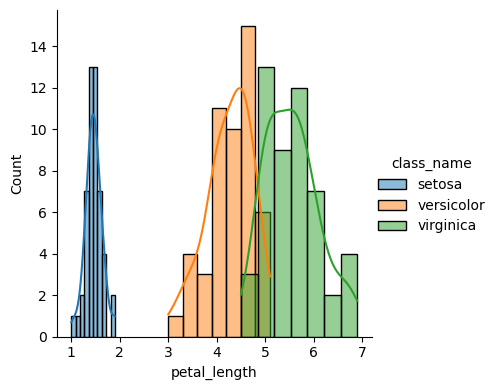

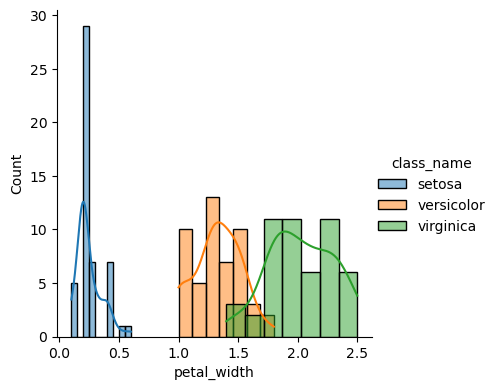

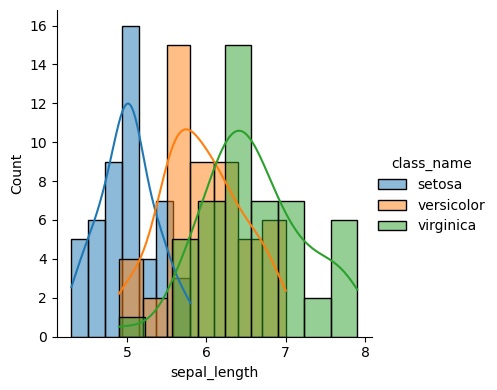

In [11]:
sns.FacetGrid(iris_df,hue="class_name",height=4).map(sns.histplot,"petal_length",kde =True).add_legend()
sns.FacetGrid(iris_df,hue="class_name",height=4).map(sns.histplot,"petal_width",kde =True).add_legend()
sns.FacetGrid(iris_df,hue="class_name",height=4).map(sns.histplot,"sepal_length", kde =True).add_legend()
plt.show()

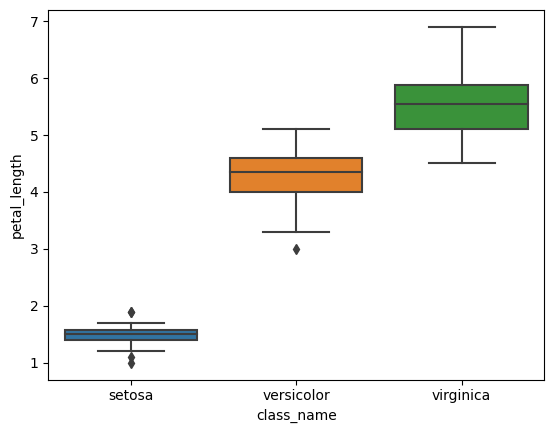

In [12]:
sns.boxplot(x="class_name",y="petal_length",data=iris_df)
plt.show()

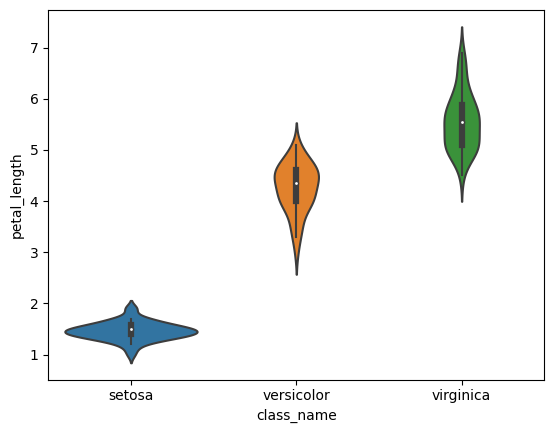

In [13]:
sns.violinplot(x="class_name",y="petal_length",data=iris_df)
plt.show()

In [14]:
sns.heatmap(data = iris_df.corr(), annot= True);

In [15]:
iris_df_without_class = iris_df.loc[:, ~iris_df.columns.isin(['class'])]

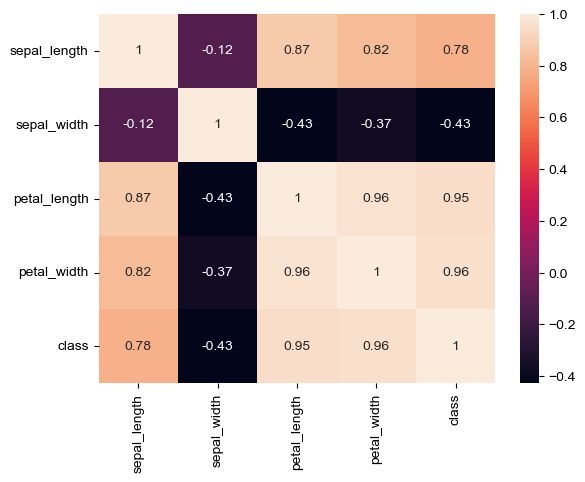

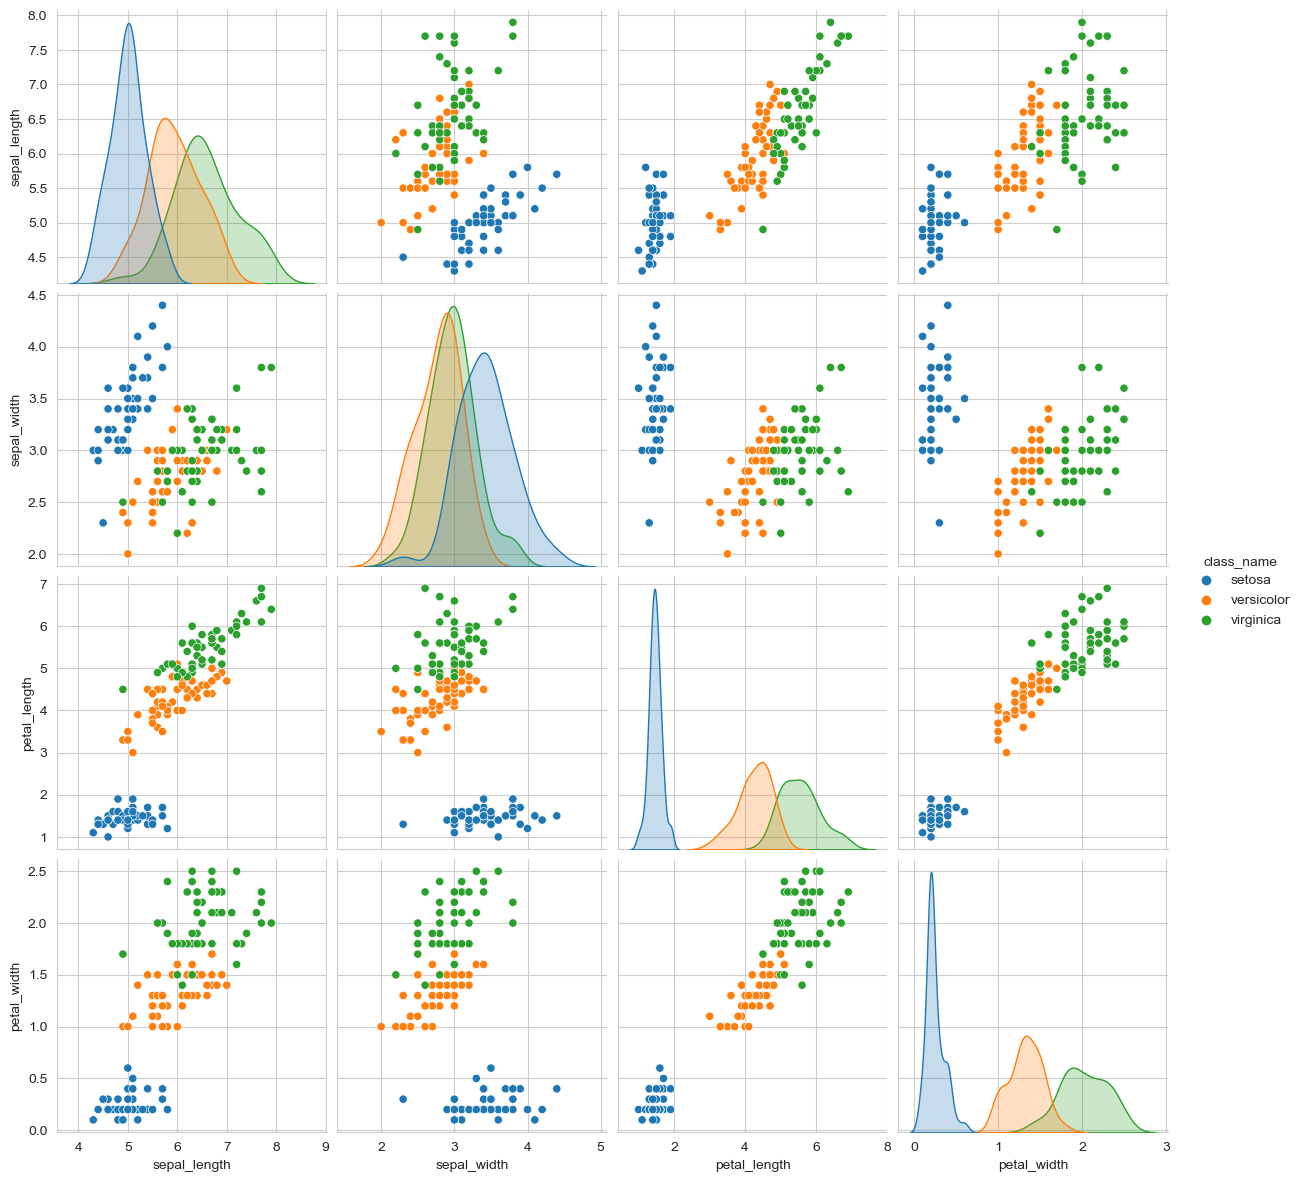

In [16]:
sns.set_style("whitegrid")
sns.pairplot(iris_df_without_class,hue="class_name",height=3);
plt.show()

# K-Means

### Ripasso del funzionamento di KMeans

* Scegli il numero di cluster k
* Seleziona k punti casuali dai dati come centroidi
* Assegna tutti i punti al centroide del cluster più vicino
* Ricalcolare i centroidi dei cluster appena formati
* Ripetere i passaggi 3 e 4

In [17]:
# Trovare il numero ottimale di cluster

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 0, n_init = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\garif\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Utilizzo del metodo di elbow per determinare il numero ottimale di cluster per k-means


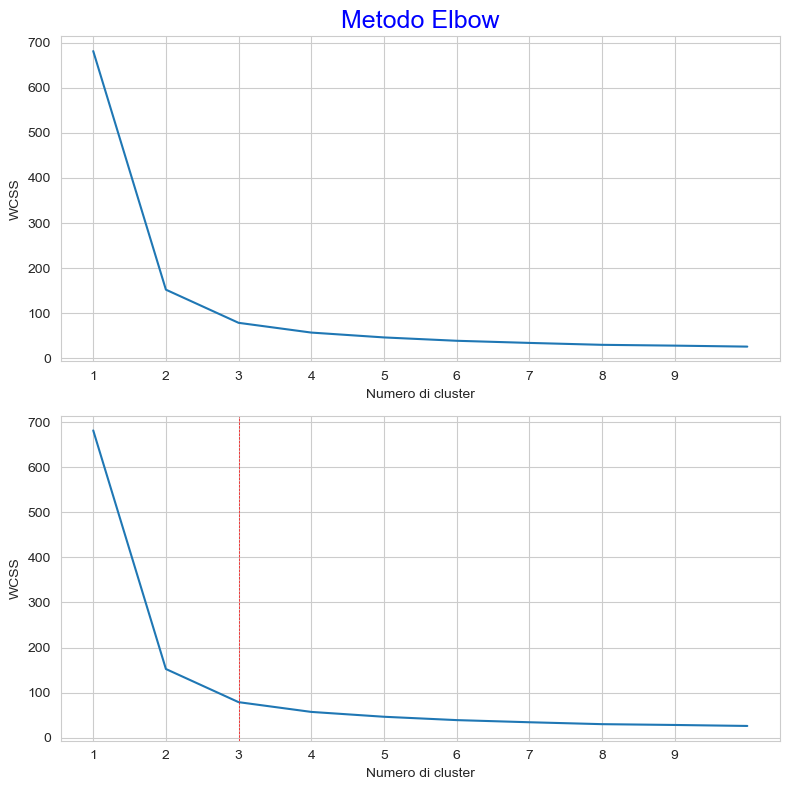

In [18]:
fig, axs = plt.subplots(2)

fig.set_size_inches(8,8)

axs[0].plot(range(1, 11), wcss)
axs[0].set_title('Metodo Elbow', fontsize=18, color = 'b')
axs[0].set_xlabel('Numero di cluster')
axs[0].set_ylabel('WCSS') 
axs[0].set_xticks(np.arange(1, 10, step=1))

axs[1].plot(range(1, 11), wcss)
axs[1].set_xlabel('Numero di cluster')
axs[1].set_ylabel('WCSS') 
axs[1].set_xticks(np.arange(1, 10, step=1))
axs[1].axvline(3,color='r', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

Il k ottimale è 3.

Per approndimenti sul metodo elbow potete vedere la libreria specifica di riferimento qui: 
    https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

### Creazione del modello di clustering con k = 3

In [19]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0, n_init = 'auto')
y_kmeans = kmeans.fit_predict(X)

TypeError: '<=' not supported between instances of 'str' and 'int'

In [ ]:
x=X[:,0], y=X[:, 1], c=y

In [ ]:
# Visualizzazione dei cluster

plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 80, c = 'purple', label = 'Iris-setosa')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 80, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 80, c = 'green', label = 'Iris-virginica')

# Plot dei centroidi dei cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 40, c = 'red', label = 'Centroids', marker = 'x')

plt.tight_layout()

plt.legend();

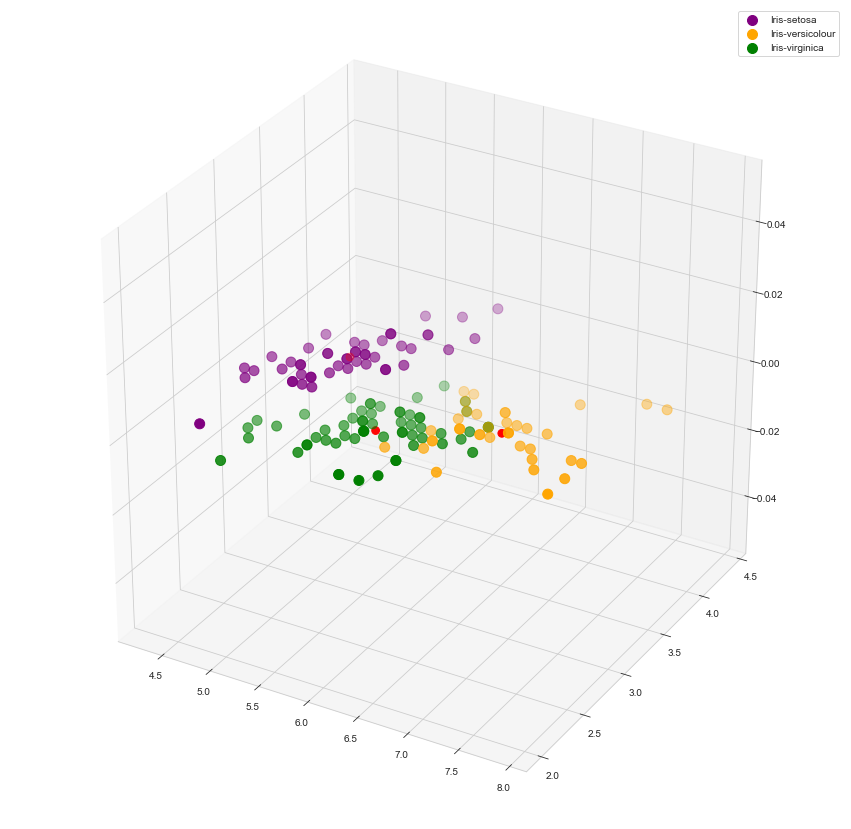

In [21]:
# 3D scatterplot con matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.legend()

# Plot dei centroidi dei cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 60, c = 'red', label = 'Centroids')
plt.show()

In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.legend()
